# Lab 1: Machine Learning and Data Acquisition

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\olsso\anaconda3\envs\DT374B\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


TODO: record new data with 100ms interval and clean start and stop

## Acquire some data

Function for reading csv file:

In [2]:
def read_csv(filepath, cols, names):
    df = pd.read_csv(filepath, usecols=cols, names=names, header=None)
    df = df.drop([0], axis=0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

### Accelerometer

In [65]:
lie_acc_data = read_csv("data/raw/train/lie_acc1.csv", [2,3,4], ['ax', 'ay', 'az'])
stand_acc_data = read_csv("data/raw/train/stand_acc1.csv", [2,3,4], ['ax', 'ay', 'az'])

In [66]:
lie_acc_data

,ax,ay,az
1,0.900300,9.901201,-0.349352
2,0.325424,9.990034,-0.416650
3,0.088235,10.121640,-0.397209
4,0.222233,10.088140,-0.486042
5,0.425922,10.124033,-0.354138
...,...,...,...
1396,-0.462712,9.189935,0.915255
1397,-0.453141,9.335897,0.697508
1398,-0.453141,9.335897,0.697508
1399,-0.453141,9.335897,0.697508


* Plot the accelerometer values using the the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector.

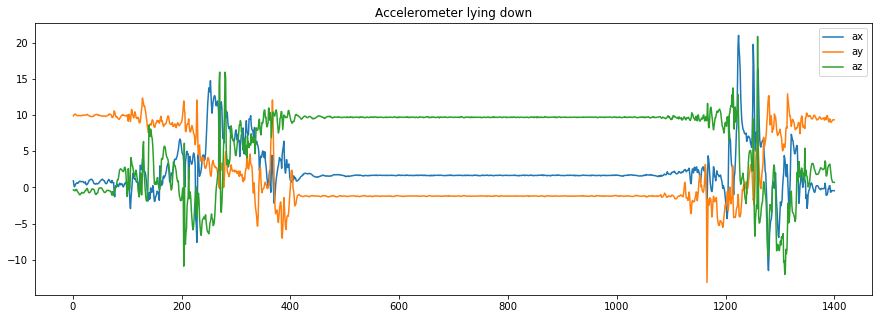

In [67]:
lie_acc_data.plot(kind = "line", title = "Accelerometer lying down", figsize=(15,5))
plt.show()

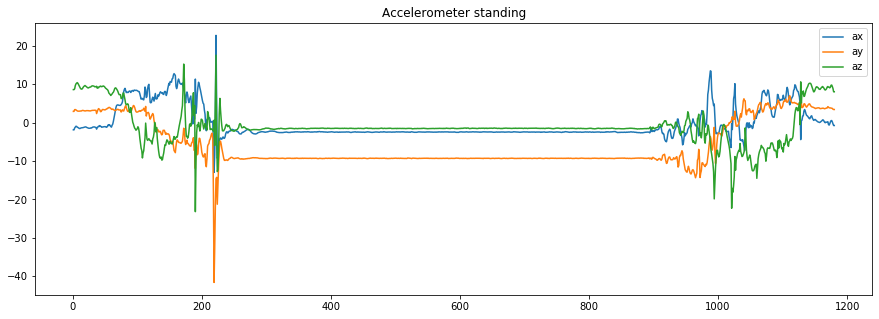

In [68]:
stand_acc_data.plot(kind = "line", title = "Accelerometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the accelerometer?<p>

    G-force. If the accelerometer is reasonably leveled one axis should show about &pm;1g and the other two axes around 0g.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the accelerometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [7]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 100 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Even though the phone (and hence the accelerometer) is still, the output from the three axes is different in the two plots. The reason is that the phone is positioned differently in regards to earths gravitation laying down compared to standing. Therefore, earth's gravity pulls different axes.

### Magnetometer

In [69]:
lie_mag_data = read_csv("data/raw/train/lie_mag1.csv", [2,3,4], ['mx', 'my', 'mz'])
stand_mag_data = read_csv("data/raw/train/stand_mag1.csv", [2,3,4], ['mx', 'my', 'mz'])

In [70]:
lie_mag_data

,mx,my,mz
1,-32.718750,-48.562504,-29.043750
2,-30.018751,-46.968750,-28.200000
3,-30.975000,-48.750004,-27.468752
4,-32.512500,-47.456253,-26.325000
5,-31.968752,-45.900000,-27.525002
...,...,...,...
1410,-30.150002,-18.600000,-43.443752
1411,-30.150002,-18.600000,-43.443752
1412,-30.150002,-18.600000,-43.443752
1413,-30.150002,-18.600000,-43.443752


* Plot the magnetometer values using the the plot functions accessible for panda dataframes. Plot all magnetometer values, i.e. all samples for all components of the magnetometer vector.

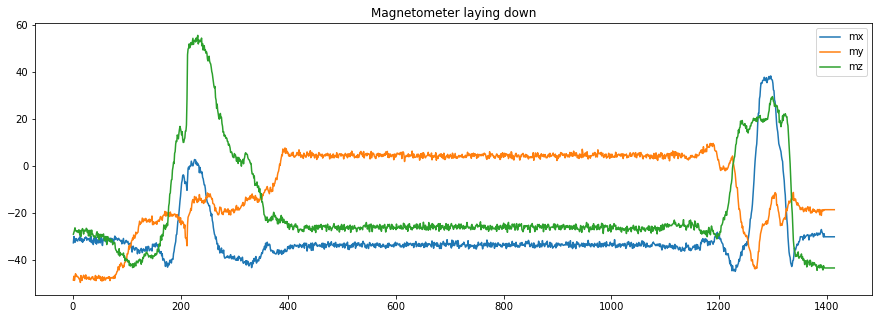

In [51]:
lie_mag_data.plot(kind = "line", title = "Magnetometer laying down", figsize=(15,5))
plt.show()

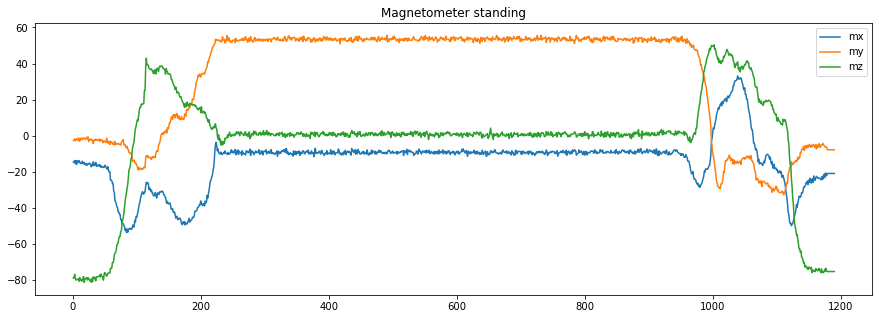

In [52]:
stand_mag_data.plot(kind = "line", title = "Magnetometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the magnetometer?<p>
    
    The force of the magnetic field around the phone.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the magnetometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [12]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 10 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Assuming earth's magnetic field has the largest contribution to the magnetic field around the phone and all other magnetic field components are negligible, the same reasoning should hold true for the magnetometer as for the accelerometer - the phone is positioned differently in space, thus giving different output in the three axes.

## Vector algebra

### Formulas

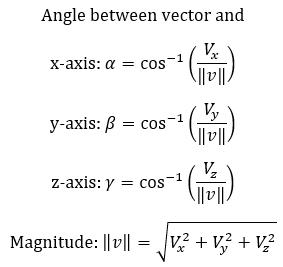

TODO: Use linalg.norm() and dot product instead

### Calculation functions

In [13]:
def calc_magnitude(df, i):
    return np.sqrt(df[df.columns[0]].iloc[i]**2 + df[df.columns[1]].iloc[i]**2 + df[df.columns[2]].iloc[i]**2)

In [14]:
def calc_angle(df, axis, i):
    return np.rad2deg(np.arccos(df[axis].iloc[i] / calc_magnitude(df, i)))

In [15]:
def calc_magnitudes(df):
    l = []
    
    for i in range(len(df)):
        l.append(calc_magnitude(df, i))
        
    return pd.DataFrame({'Magnitude': l})

In [16]:
def calc_angles(df, axis):
    l = []
    
    for i in range(len(df)):
        l.append(calc_angle(df, axis, i))
        
    return pd.DataFrame({'Angle in degrees': l})

### Calculations and plots

* Calculate the angle between the acceleration values and the z-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

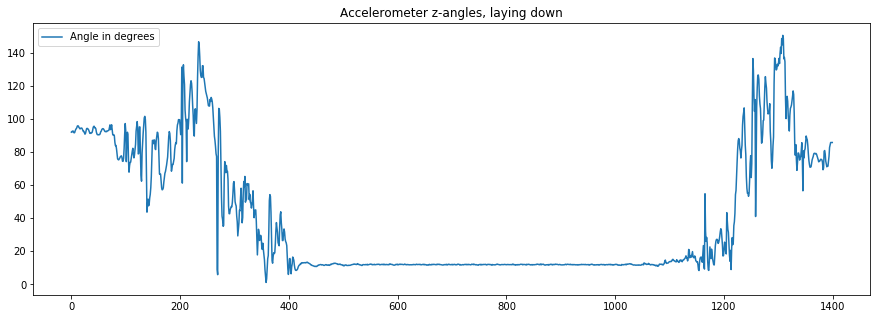

In [53]:
lie_acc_z_angles = calc_angles(lie_acc_data, lie_acc_data.columns[2])
lie_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, laying down", figsize=(15,5))
plt.show()

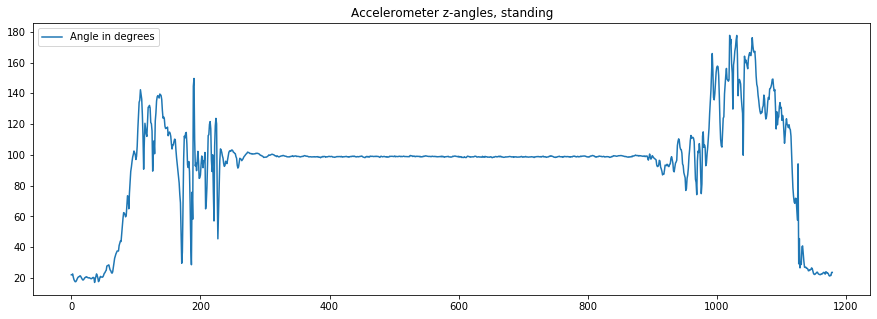

In [54]:
stand_acc_z_angles = calc_angles(stand_acc_data, stand_acc_data.columns[2])
stand_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, standing", figsize=(15,5))
plt.show()

* Calculate the angle between the magnetometer values and the y-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

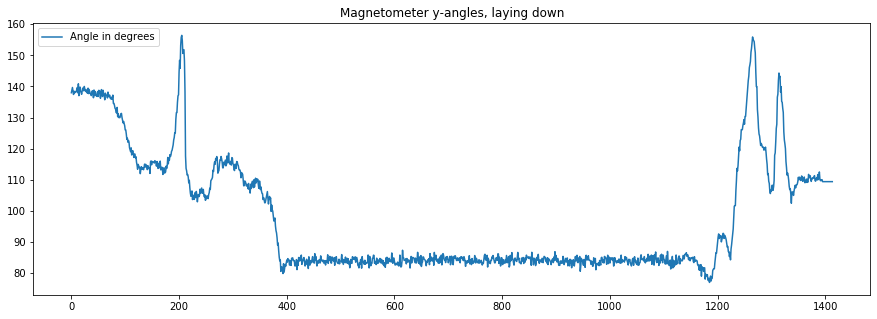

In [55]:
lie_mag_y_angles = calc_angles(lie_mag_data, lie_mag_data.columns[1])
lie_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, laying down", figsize=(15,5))
plt.show()

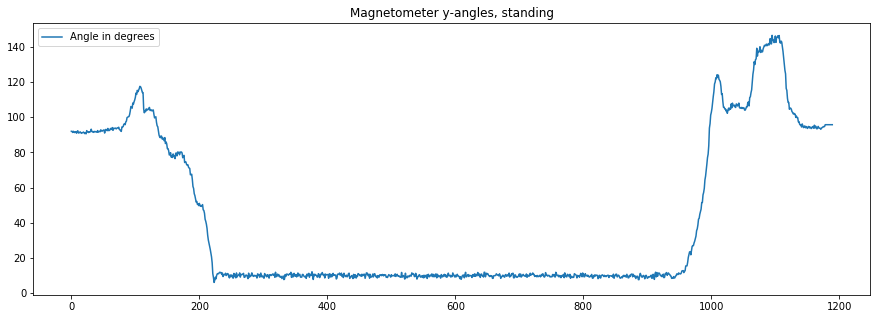

In [20]:
stand_mag_y_angles = calc_angles(stand_mag_data, stand_mag_data.columns[1])
stand_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the accelerometer data for all samples, store and plot.

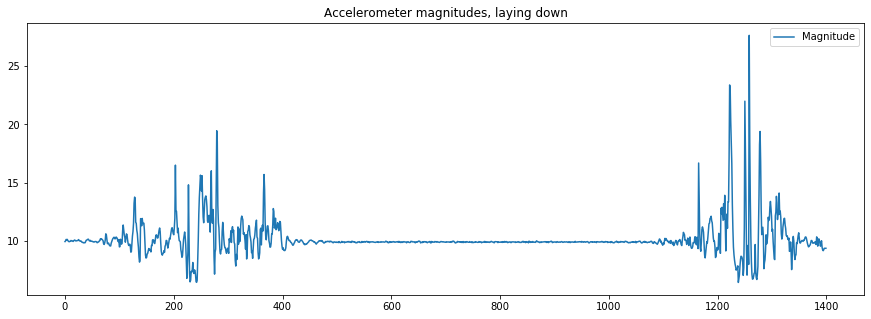

In [56]:
lie_acc_magnitudes = calc_magnitudes(lie_acc_data)
lie_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, laying down", figsize=(15,5))
plt.show()

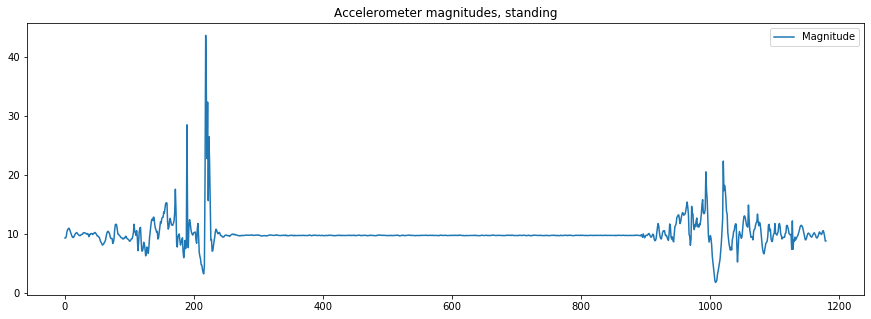

In [22]:
stand_acc_magnitudes = calc_magnitudes(stand_acc_data)
stand_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the magnetometer data for all samples, store and plot.

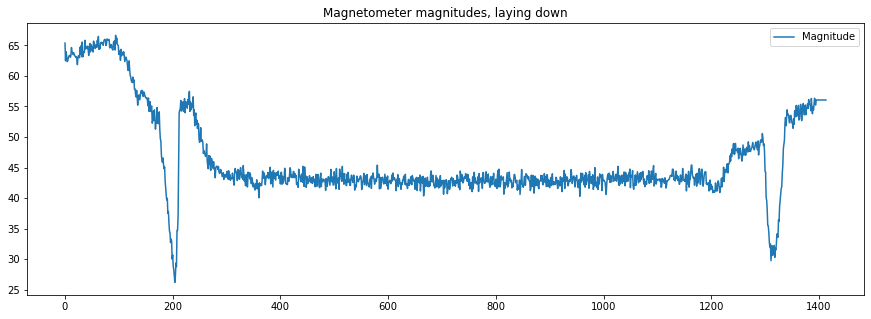

In [57]:
lie_mag_magnitudes = calc_magnitudes(lie_mag_data)
lie_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, laying down", figsize=(15,5))
plt.show()

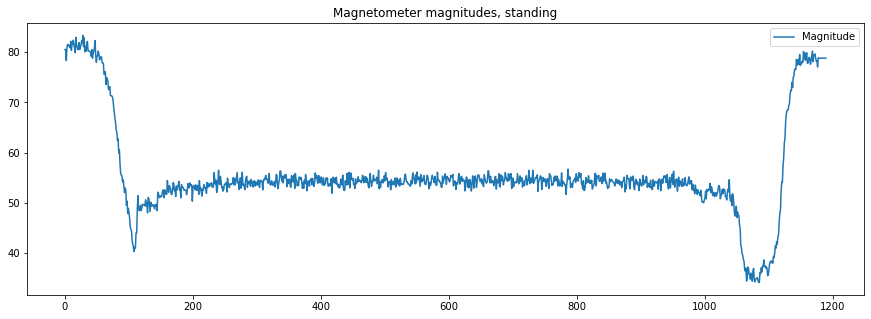

In [24]:
stand_mag_magnitudes = calc_magnitudes(stand_mag_data)
stand_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, standing", figsize=(15,5))
plt.show()

## Clean up data

### Removal of corrupt data

As seen in the graphs, the beginning and the end of the data sets do not represent the different classes. This corrupt data is taken away and saved in new files in the folder 'cleaned'. The raw data is stored in the folder 'raw'.

All 'acc' files are read into a list, then the corresponding 'mag' file is also read. It is importans to remove data at the same indexes in the data pair, as they are connected, i.e., recorder simultaneously. Both data sets are plotted for manual inspection. Then the upper and lower limits are set and the data pair is cleaned and stored.

Function for reading all csv files::

In [329]:
def read_all_acc_csvs(path):
    files = []
    
    for file in glob.glob(path + '*/' '*acc*.csv'):
        files.append(file)
        
    return files

Read in all raw data files:

In [332]:
raw_data_files = read_all_acc_csvs('data/raw/')
raw_data_files

['data/raw\\test\\lie_acc3.csv',
 'data/raw\\test\\sit_acc3.csv',
 'data/raw\\test\\stand_acc3.csv',
 'data/raw\\train\\lie_acc1.csv',
 'data/raw\\train\\lie_acc2.csv',
 'data/raw\\train\\sit_acc1.csv',
 'data/raw\\train\\sit_acc2.csv',
 'data/raw\\train\\stand_acc1.csv',
 'data/raw\\train\\stand_acc2.csv']

Inspect raw data:

In [411]:
file_index = 8

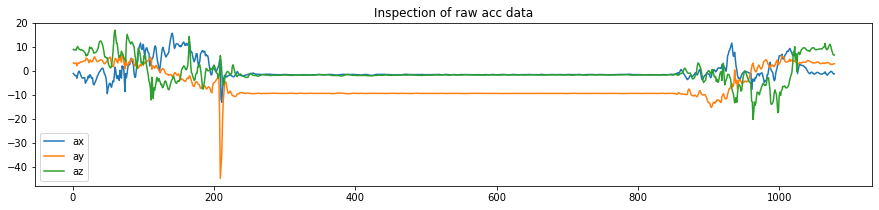

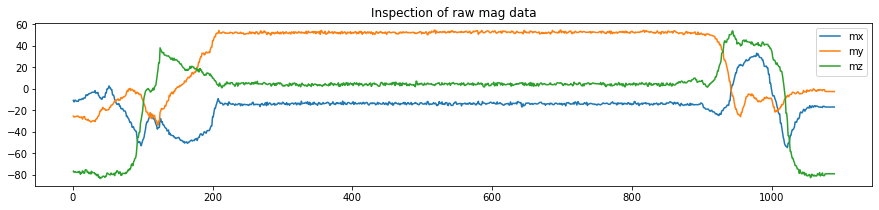

In [412]:
temp_df_acc = read_csv(raw_data_files[file_index], [2,3,4], ['ax', 'ay', 'az'])
temp_df_acc.plot(kind = "line", title='Inspection of raw acc data', figsize=(15,3))
plt.show()

temp_df_mag = read_csv(raw_data_files[file_index].replace('acc', 'mag'), [2,3,4], ['mx', 'my', 'mz'])
temp_df_mag.plot(kind = "line", title='Inspection of raw mag data', figsize=(15,3))
plt.show()

Select lower and upper bounds for removal:

In [413]:
lower = 300
upper = 800

Remove corrupt data:

In [414]:
upper = upper - lower

# Remove first part
temp_df_acc = temp_df_acc.drop(temp_df_acc.index[:lower], axis=0)
temp_df_mag = temp_df_mag.drop(temp_df_mag.index[:lower], axis=0)

# Remove last part
temp_df_acc = temp_df_acc.drop(temp_df_acc.index[upper:], axis=0)
temp_df_mag = temp_df_mag.drop(temp_df_mag.index[upper:], axis=0)

Inspect cleaned data:

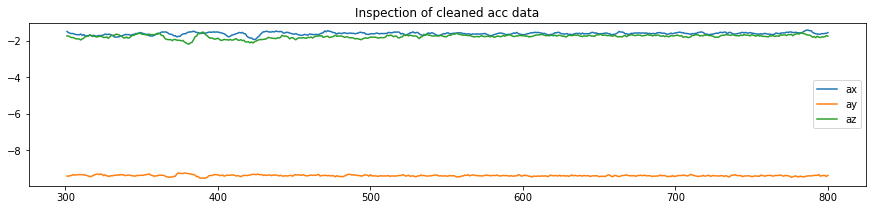

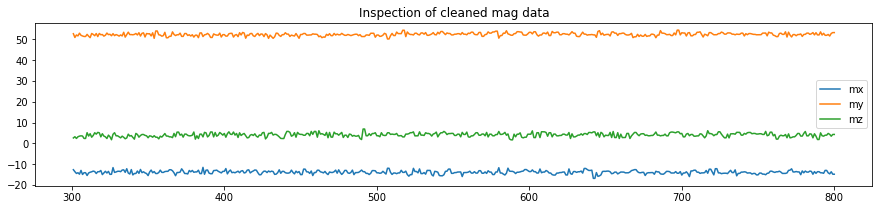

In [415]:
temp_df_acc.plot(kind = "line", title='Inspection of cleaned acc data', figsize=(15,3))
plt.show()

temp_df_mag.plot(kind = "line", title='Inspection of cleaned mag data', figsize=(15,3))
plt.show()

Write cleaned data to new file:

In [416]:
cleaned_acc_file_path = raw_data_files[file_index].replace('raw', 'cleaned')
cleaned_mag_file_path = raw_data_files[file_index].replace('raw', 'cleaned').replace('acc', 'mag')

with open(cleaned_acc_file_path, 'w') as f:
    f.close()
temp_df_acc.to_csv(cleaned_acc_file_path)

with open(cleaned_mag_file_path, 'w') as f:
    f.close()
temp_df_mag.to_csv(cleaned_mag_file_path)

print(cleaned_acc_file_path)
print(cleaned_mag_file_path)

data/cleaned\train\stand_acc2.csv
data/cleaned\train\stand_mag2.csv


### Removal and averaging of data points

## Python

* Create a python function that can read all files from a class for both sensors. The function should return a dataframe x with all the data and another dataframe y with information of which class the data belongs to.

In [327]:
import glob

def read_csvs(class_name, set_name):
    names = ['ax', 'ay', 'az', 'mx', 'my', 'mz']
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['target'])
    
    for file in glob.glob('data/cleaned/' + set_name + '/' + class_name + '*.csv'):
        if 'acc' in file:
            mag_file = file.replace('acc', 'mag')
            
            df_acc = read_csv(file, [1,2,3], names[:3])
            df_mag = read_csv(mag_file, [1,2,3], names[3:])
            
            df = pd.concat([df_acc, df_mag], axis=1, join='inner')
            X = X.append(df, ignore_index=True)
            
            print(file + '\tLength: ', end='')
            print(len(df_acc))
            print(mag_file + '\tLength: ', end='')
            print(len(df_mag))
            print(X)
            
    y['target'] = [class_name for i in range(len(X))]
        
    return X, y

In [328]:
X_sit_train, y_sit_train = read_csvs('sit', 'train')

data/cleaned/train\sit_acc1.csv	Length: 500
data/cleaned/train\sit_mag1.csv	Length: 500
           ax        ay        az         mx         my         mz
0    6.445666 -2.651248  6.837192 -57.450000  10.106251 -12.900001
1    6.498607 -2.571985  6.714859 -56.700000  10.031250  -9.675000
2    6.407381 -2.533700  6.714859 -56.400000   9.712501 -11.306251
3    6.455536 -2.538486  6.695716 -57.150000  10.068750 -11.775001
4    6.376274 -2.557628  6.868298 -56.250004   8.343750 -10.443750
..        ...       ...       ...        ...        ...        ...
495  6.402595 -2.255834  6.837192 -56.718754  10.012501 -12.431251
496  6.438487 -2.260619  6.875477 -57.168750  10.068750 -12.412500
497  6.438487 -2.260619  6.875477 -57.168750  10.068750 -12.412500
498  6.474679 -2.224727  6.822834 -57.093754   8.156250 -10.575001
499  6.532107 -2.198406  6.856334 -55.818752   9.506250 -11.962501

[500 rows x 6 columns]
data/cleaned/train\sit_acc2.csv	Length: 400
data/cleaned/train\sit_mag2.csv	Length: 

In [35]:
X_stand_train, y_stand_train = read_csvs('stand', 'train')

data/train\stand_acc1.csv
data/train\stand_mag1.csv
data/train\stand_acc2.csv
data/train\stand_mag2.csv


In [36]:
X_lay_train, y_lay_train = read_csvs('lay', 'train')

data/train\lay_acc1.csv
data/train\lay_mag1.csv
data/train\lay_acc2.csv
data/train\lay_mag2.csv


In [37]:
X_sit_test, y_sit_test = read_csvs('sit', 'test')

data/test\sit_acc3.csv
data/test\sit_mag3.csv


In [38]:
X_stand_test, y_stand_test = read_csvs('sit', 'test')

data/test\sit_acc3.csv
data/test\sit_mag3.csv


In [39]:
X_lay_test, y_lay_test = read_csvs('sit', 'test')

data/test\sit_acc3.csv
data/test\sit_mag3.csv


In [40]:
X_train = pd.concat([X_sit_train, X_stand_train, X_lay_train], ignore_index=True)

In [41]:
X_train

,ax,ay,az,mx,my,mz
0,-2.130210,4.813163,8.717651,-18.562500,-12.618751,-78.487500
1,-1.718047,4.544867,8.834899,-19.650002,-13.331250,-80.381256
2,-1.600798,4.339085,9.158230,-19.912500,-12.056251,-79.912506
3,-1.636691,4.221537,9.620643,-20.043750,-10.668751,-79.462500
4,-1.715654,4.063611,9.924830,-21.600000,-10.612500,-78.937500
...,...,...,...,...,...,...
7547,1.142274,8.900104,6.329315,-34.875000,-13.912500,-48.750004
7548,1.101596,8.219645,5.172086,-33.618750,-13.950001,-51.375004
7549,0.775574,8.008778,3.655934,-35.362503,-13.312501,-49.406254
7550,0.526421,7.999206,2.999403,-35.362503,-13.312501,-49.406254


In [42]:
y_train = pd.concat([y_sit_train, y_stand_train, y_lay_train], ignore_index=True)

In [43]:
y_train

,target
0,sit
1,sit
2,sit
3,sit
4,sit
...,...
7547,lay
7548,lay
7549,lay
7550,lay
